In [2]:
import pandas as pd
data = pd.read_csv("Iris.csv")
x = data.drop(['Species', 'Id'], axis=1)
y = data['Species']

In [3]:
x.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
117,7.7,3.8,6.7,2.2
21,5.1,3.7,1.5,0.4
118,7.7,2.6,6.9,2.3
105,7.6,3.0,6.6,2.1
143,6.8,3.2,5.9,2.3


In [4]:
y.sample(5)

141    Iris-virginica
117    Iris-virginica
17        Iris-setosa
4         Iris-setosa
108    Iris-virginica
Name: Species, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [9]:
from sklearn.svm import SVC
model = SVC(C=0.1, kernel='rbf')
#kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

In [10]:
model.fit(x_train, y_train)

SVC(C=0.1)

In [11]:
model.score(x_test, y_test)

0.9111111111111111

## GridSearchCV

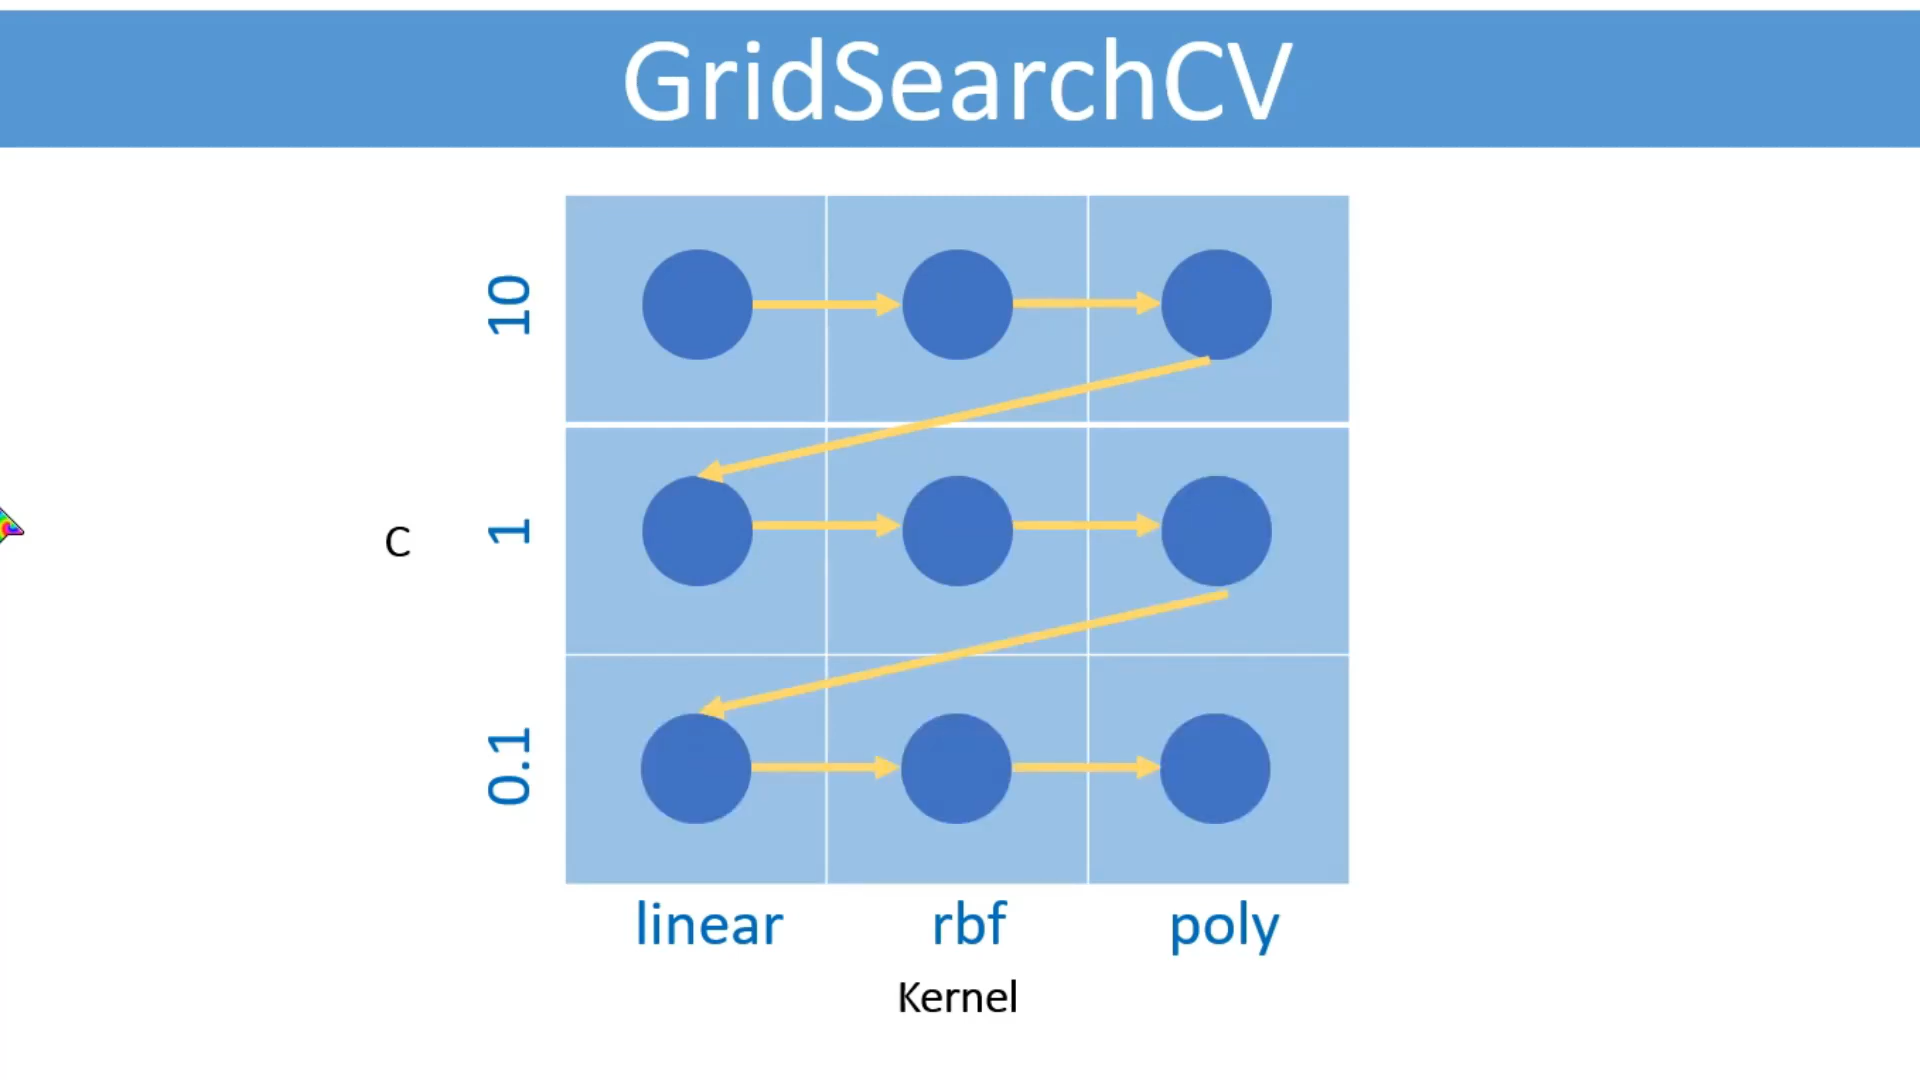

In [12]:

from sklearn.model_selection import GridSearchCV

In [13]:
param_grid = {'C':[0.1, 1, 10],
             'kernel':['rbf', 'linear', 'poly']}

In [14]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(C=0.1),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly']})

In [15]:
grid_search.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [16]:
grid_search.score(x_test, y_test)

0.9333333333333333

## RandomizedSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
param_dist = {'C':[0.1, 1, 10],
             'kernel':['rbf', 'linear', 'poly']}

In [32]:
randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5)
randomized_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=SVC(C=0.1), n_iter=5,
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'poly']})

In [33]:
randomized_search.best_params_

{'kernel': 'linear', 'C': 10}

In [34]:
randomized_search.score(x_test, y_test)

0.9555555555555556